# Lab Sheet 5

# Logistic Regression for Classification

# PART A : Prerequisitesfor Logistic Regression implementation

## 1. Plot the attached dataset data1.csvusing scatter plot.  There is a target feature with discrete values 0,1. If the target feature is 1, the samples should be shown as red circle. If the target feature is 0, the samples should be shown as green x

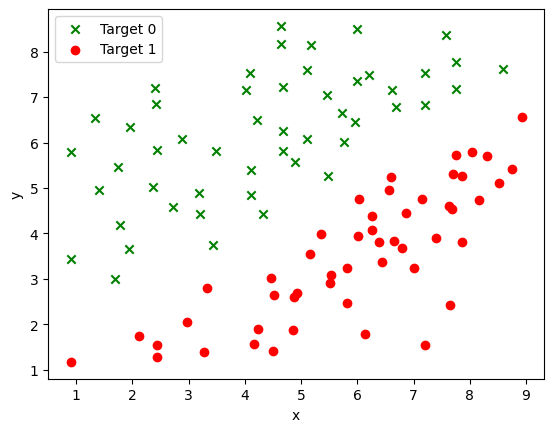

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data1.csv')

target_0 = df[df['y'] == 0]
target_1 = df[df['y'] == 1]

plt.scatter(target_0['x1'], target_0['x2'], c='green', marker='x', label='Target 0')
plt.scatter(target_1['x1'], target_1['x2'], c='red', marker='o', label='Target 1')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


## 2.Plot a line y=(2x+3)

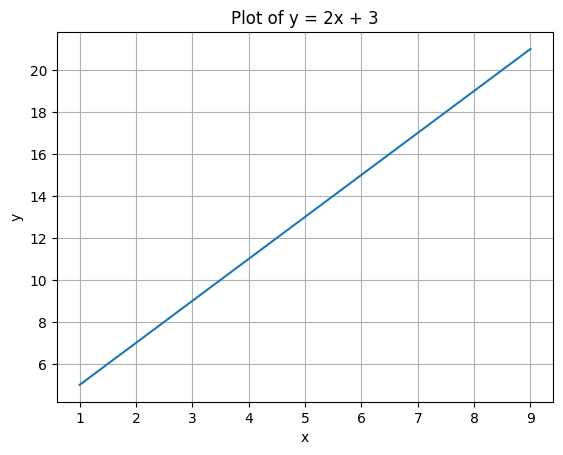

In [138]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 9, 100)
y = 2*x + 3

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = 2x + 3')
plt.grid(True)
plt.show()


## 3. Define a function sigmoid(z) that takes one parameter z and computes 1/(1+e^-z).Create a vector  V  with 10  values  randomly  in  the  range  [-1000,1000].  Transform  V  to  V'  that consists of  respective sigmoid  values  using  the  defined  function.  Observe  the  range  of output values in V'.

In [139]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

V = np.random.uniform(low=-1000, high=1000, size=10)
V_prime = sigmoid(V)

print(V_prime)


[1.00000000e+000 1.23716501e-101 1.00000000e+000 0.00000000e+000
 1.00000000e+000 1.00000000e+000 2.22270894e-130 1.00000000e+000
 1.00000000e+000 2.67643450e-006]


C:\Users\aadit\AppData\Local\Temp\ipykernel_27156\1455778885.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


## 4. Define a function hypothesis(theta, X) that takes two vectors as parameters, theta and X. If sigmoid(theta.X)>= 0.5, output 0 else output 1.

In [140]:
def hypothesis(theta, X):
    sigmoid_value = sigmoid(np.dot(theta, X))
    if sigmoid_value >= 0.5:
        return 0
    else:
        return 1


## 5. Define a function cost(theta,X,y) to compute the error Error = 1/m*Σ-yilog(hθ(xi))-(1-yi)log(1-hθ(xi))Where xi is the ithsample and yi is the ithlabel, hθ(xi) is the hypothesis(theta,xi)

In [141]:
def cost(theta, X, y):
    m = len(y)
    h = hypothesis(theta, X)
    error = (-1/m) * np.sum(y*np.log(h) + (1-y)*np.log(1-h))
    return error


# PART B : Implementation of logistic regression

## 6. Implement gradient descent algorithm for logistic regressionin data set loan_data.csv.read training datasetconvert dataset to a feature matrix Xnormalizing feature matrix Xstack columns with all ones in feature matrix target feature to be taken in a separatevector initial theta values gradient descentupdationDisplay estimated theta values and number of iterations to convergePredictfor test data

In [142]:
import numpy as np
import pandas as pd
df = pd.read_csv('./loan_data.csv')

df.shape
df



,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [143]:
df.shape

(614, 13)

In [144]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [145]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [146]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [147]:
df.dropna(inplace=True)

In [148]:
df.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [149]:
df.shape

(480, 13)

In [150]:
print(df.groupby('Dependents').size())


Dependents
0     274
1      80
2      85
3+     41
dtype: int64


In [151]:
change_to_num = {"Gender": {"Male":0,"Female":1},
                 "Married": {"No":0, "Yes":1},
                 "Education" :{"Not Graduate":0,"Graduate":1},
                 "Self_Employed":{"No":0, "Yes":1},
                 "Property_Area":{"Rural":1,"Semiurban":2,"Urban":3},
                 "Loan_Status":{"N":0, "Y":1},
                 "Dependents":{"0":0,"1":1,"2":2,"3+":3}}


In [152]:
df = df.replace(change_to_num)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,1,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,3,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,3,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,3,1
5,LP001011,0,1,2,1,1,5417,4196.0,267.0,360.0,1.0,3,1


In [153]:
arr=df.values
n = df.shape[0]
x = arr[:,1:-1] #independent variable
y = arr[:,-1] #dependent variable
x = np.array(x,dtype=np.longdouble)
y = np.array(y,dtype=np.longdouble)
o = np.ones((n,1))
x=np.concatenate((o, x), axis=1)
Y=y.reshape(y.shape[0],1)
print(Y.shape)
print(y.dtype)
print(y.shape)
print(x)

(480, 1)
float64
(480,)
[[  1.   0.   1. ... 360.   1.   1.]
 [  1.   0.   1. ... 360.   1.   3.]
 [  1.   0.   1. ... 360.   1.   3.]
 ...
 [  1.   0.   1. ... 360.   1.   3.]
 [  1.   0.   1. ... 360.   1.   3.]
 [  1.   1.   0. ... 360.   0.   2.]]


In [154]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))


In [155]:
def hypothesis(theta,x):
    if sigmoid(np.dot(theta,x))>=0.5:
        return 1
    return 0


In [156]:
def predict(theta,x):
    y_pred=[]
    for i in range(x.shape[0]):
        y_pred.append(hypothesis(theta,x[i]))
    y=np.array(y_pred)
    y_pred = y.reshape(y.shape[0],1)
    return y_pred


In [157]:
def loss(y,h):
    m=y.shape[0]
    total_cost = -(1/m) * (np.sum(y*np.log(h) + (1-y)*np.log(1-h)))
    return total_cost


In [158]:
theta = np.zeros((x.shape[1],1))

In [159]:
def gradient_descent(alpha, x, y, theta, epoch):
    for i in range(epoch):
        y_pred = predict(theta,x)
        der = np.dot(x.T,(y_pred-y))/y.shape[0]
        theta = theta - alpha*der
        print(f"Iteration {i + 1}, Theta: {theta}")

    return theta

In [160]:
print(x.shape)
print(theta.shape)


(480, 12)
(12, 1)


In [161]:
theta = gradient_descent(0.01, x, Y, theta.T,1500)


Iteration 1, Theta: [[-3.08333333e-03 -3.08333333e-03 -3.08333333e-03 -3.08333333e-03
  -3.08333333e-03 -3.08333333e-03 -3.08333333e-03 -3.08333333e-03
  -3.08333333e-03 -3.08333333e-03 -3.08333333e-03 -3.08333333e-03]
 [-6.66666667e-04 -6.66666667e-04 -6.66666667e-04 -6.66666667e-04
  -6.66666667e-04 -6.66666667e-04 -6.66666667e-04 -6.66666667e-04
  -6.66666667e-04 -6.66666667e-04 -6.66666667e-04 -6.66666667e-04]
 [-1.75000000e-03 -1.75000000e-03 -1.75000000e-03 -1.75000000e-03
  -1.75000000e-03 -1.75000000e-03 -1.75000000e-03 -1.75000000e-03
  -1.75000000e-03 -1.75000000e-03 -1.75000000e-03 -1.75000000e-03]
 [-2.22916667e-03 -2.22916667e-03 -2.22916667e-03 -2.22916667e-03
  -2.22916667e-03 -2.22916667e-03 -2.22916667e-03 -2.22916667e-03
  -2.22916667e-03 -2.22916667e-03 -2.22916667e-03 -2.22916667e-03]
 [-2.33333333e-03 -2.33333333e-03 -2.33333333e-03 -2.33333333e-03
  -2.33333333e-03 -2.33333333e-03 -2.33333333e-03 -2.33333333e-03
  -2.33333333e-03 -2.33333333e-03 -2.33333333e-03 -2

C:\Users\aadit\AppData\Local\Temp\ipykernel_27156\3490041878.py:2: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-z)))


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [162]:
import numpy as np
import pandas as pd
import random
# import sklearn
# from sklearn.datasets.samples_generator import make_regression 
import pylab
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt

def compute_cost_function(m, t0, t1, x, y):
  return 1/2/m * sum([(t0 + t1* np.asarray([x[i]]) - y[i])**2 for i in range(m)])

def gradient_descent(alpha, x, y, ep=0.0001, max_iter=1500):
    converged = False
    iter = 0
    m = x.shape[0] # number of samples

    # initial theta
    t0 = 0
    t1 = 0

    # total error, J(theta)
    J = compute_cost_function(m, t0, t1, x, y)
    print('J=', J);
    # Iterate Loop
    num_iter = 0
    while not converged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        grad0 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i])*np.asarray([x[i]]) for i in range(m)])

        # update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
    
        # update theta
        t0 = temp0
        t1 = temp1

        # mean squared error
        e = compute_cost_function(m, t0, t1, x, y)
        print ('J = ', e)
        J = e   # update error 
        iter += 1  # update iter
    
        if iter == max_iter:
            print ('Max interactions exceeded!')
            converged = True

    return t0,t1

def plot_cost_function(x, y, m):
    t0 = list(range(0, x.shape[0]))
    j_values = []
    for i in range(len(t0)):
        j_values.append(compute_cost_function(m, i, i, x, y)[0])
    print ('j_values', len(j_values), len(x), len(y))
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(x, y, j_values, label='parametric curve')
    ax.legend()
    plt.show()


In [163]:
theta0, theta1 = gradient_descent(0.01, x, y, 0.01, max_iter=1500)
print ('theta0 = ' + str(theta0)+' theta1 = '+str(theta1))

J= [[0.34583333 0.34583333 0.34583333 0.34583333 0.34583333 0.34583333
  0.34583333 0.34583333 0.34583333 0.34583333 0.34583333 0.34583333]]
J =  [[3.36360958e-01 3.40948171e-01 3.38865163e-01 3.38057244e-01
  3.37929558e-01 3.40993881e-01 3.93659001e+10 4.99552780e+08
  1.29226905e+04 3.38084243e+05 3.36548389e-01 3.21844675e-01]]
J =  [[3.27263689e-01 3.36163667e-01 3.32103308e-01 3.30590258e-01
  3.30292368e-01 3.36252726e-01 1.45698797e+22 4.35582064e+18
  9.64313929e+08 4.96159349e+11 3.27591516e-01 3.00456899e-01]]
J =  [[3.18526672e-01 3.31477744e-01 3.25541647e-01 3.23419375e-01
  3.22912760e-01 3.31607871e-01 5.39251978e+33 3.79803181e+28
  7.19597637e+13 7.28144506e+17 3.18951114e-01 2.81387556e-01]]
J =  [[3.10135641e-01 3.26888368e-01 3.19174239e-01 3.16532149e-01
  3.15782035e-01 3.27057359e-01 1.99584829e+45 3.31167117e+38
  5.36983594e+18 1.06859706e+24 3.10615988e-01 2.64384873e-01]]
J =  [[3.02076895e-01 3.22393547e-01 3.12995319e-01 3.09916664e-01
  3.08891788e-01 3.2

C:\Users\aadit\AppData\Local\Temp\ipykernel_27156\815845494.py:13: RuntimeWarning: overflow encountered in square
  return 1/2/m * sum([(t0 + t1* np.asarray([x[i]]) - y[i])**2 for i in range(m)])


J =  [[1.60272504e-001 2.18466056e-001 1.87824438e-001 1.91212088e-001
  1.77290393e-001 2.19075632e-001             inf             inf
  3.42541783e+179 3.36120578e+227 1.52436632e-001 1.27011457e-001]]
J =  [[1.58148338e-001 2.16203709e-001 1.85528164e-001 1.89312956e-001
  1.75066127e-001 2.16810313e-001             inf             inf
  2.55614121e+184 4.93277720e+233 1.49980187e-001 1.26633742e-001]]
J =  [[1.56108289e-001 2.13987903e-001 1.83299584e-001 1.87478536e-001
  1.72916646e-001 2.14590981e-001             inf             inf
  1.90746304e+189 7.23915537e+239 1.47610315e-001 1.26293072e-001]]
J =  [[1.54149025e-001 2.11817675e-001 1.81136689e-001 1.85706218e-001
  1.70839424e-001 2.12416701e-001             inf             inf
  1.42340150e+194 1.06239079e+246 1.45323956e-001 1.25985432e-001]]
J =  [[1.52267349e-001 2.09692087e-001 1.79037530e-001 1.83993501e-001
  1.68832024e-001 2.10286558e-001             inf             inf
  1.06218144e+199 1.55912413e+252 1.4311815

C:\Users\aadit\AppData\Local\Temp\ipykernel_27156\815845494.py:13: RuntimeWarning: overflow encountered in add
  return 1/2/m * sum([(t0 + t1* np.asarray([x[i]]) - y[i])**2 for i in range(m)])
C:\Users\aadit\AppData\Local\Temp\ipykernel_27156\815845494.py:31: RuntimeWarning: overflow encountered in add
  grad0 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i]) for i in range(m)])
C:\Users\aadit\AppData\Local\Temp\ipykernel_27156\815845494.py:32: RuntimeWarning: overflow encountered in multiply
  grad1 = 1.0/m * sum([(t0 + t1*np.asarray([x[i]]) - y[i])*np.asarray([x[i]]) for i in range(m)])
C:\Users\aadit\AppData\Local\Temp\ipykernel_27156\815845494.py:35: RuntimeWarning: invalid value encountered in subtract
  temp0 = t0 - alpha * grad0
C:\Users\aadit\AppData\Local\Temp\ipykernel_27156\815845494.py:36: RuntimeWarning: invalid value encountered in subtract
  temp1 = t1 - alpha * grad1
C:\Users\aadit\AppData\Local\Temp\ipykernel_27156\815845494.py:32: RuntimeWarning: overflow encountered

J =  [[1.33620514e-001 1.85727388e-001 1.56760163e-001 1.66188089e-001
  1.48117820e-001 1.86226872e-001             inf             inf
  2.36333598e+262             inf 1.20604800e-001 1.23697205e-001]]
J =  [[1.32551767e-001 1.84138186e-001 1.55378215e-001 1.65098930e-001
  1.46873177e-001 1.84628281e-001             nan             inf
  1.76358646e+267             inf 1.19269032e-001 1.23612986e-001]]
J =  [[1.31525342e-001 1.82581638e-001 1.54036842e-001 1.64042326e-001
  1.45670244e-001 1.83062128e-001             nan             inf
  1.31603683e+272             inf 1.17980207e-001 1.23534080e-001]]
J =  [[1.30539563e-001 1.81057069e-001 1.52734843e-001 1.63017016e-001
  1.44507612e-001 1.81527756e-001             nan             inf
  9.82062964e+276             inf 1.16736666e-001 1.23459919e-001]]
J =  [[1.29592822e-001 1.79563820e-001 1.51471050e-001 1.62021797e-001
  1.43383921e-001 1.80024516e-001             nan             inf
  7.32842457e+281             inf 1.1553680

In [164]:
for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

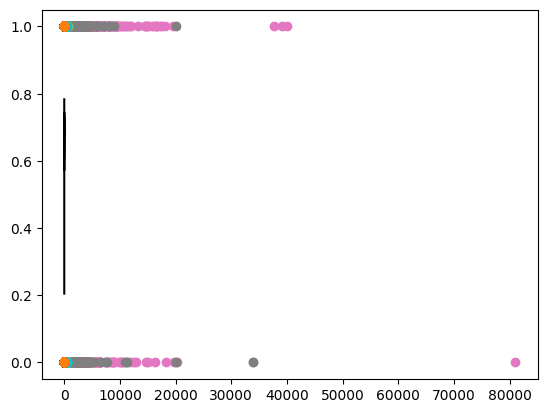

In [167]:
pylab.plot(x,y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()


## 7. Use sklearn built in function to find themodel

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [169]:
df.shape

(480, 13)

In [168]:
df.dtypes


Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [170]:
X = df.iloc[1:,1:-1].values
y = df.iloc[1:,-1].values


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=0)


In [173]:
clf =LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
predicted = clf.predict(X_test)
print(clf.score(X_test,y_test))

0.8229166666666666


C:\Users\aadit\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# PART C: Performance Evaluationof the classifier

## Computeconfusion matrix.

In [175]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [178]:
confusion_matrix(y_test, predicted)

array([[ 26,  30],
       [  4, 132]], dtype=int64)

## Compute the accuracy score

In [182]:
from sklearn import metrics
accuracy_buitin = metrics.accuracy_score(predicted,y_test)
print('Accuracy: ',accuracy_buitin)


Accuracy:  0.8229166666666666


## Print a classification report using the following sklearn function

In [183]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))


              precision    recall  f1-score   support

           0       0.87      0.46      0.60        56
           1       0.81      0.97      0.89       136

    accuracy                           0.82       192
   macro avg       0.84      0.72      0.75       192
weighted avg       0.83      0.82      0.80       192



## Plot ROC curve for loan status

In [190]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted)


In [191]:
print(fpr)



[0.         0.53571429 1.        ]


## Compare the performance of classifiers obtained in 6 and 7

In [212]:
def r_squared(y, y_predict):
    mean_y = np.mean(y)
    ss_total = np.sum((y - mean_y)**2)
    ss_residual = np.sum((y - y_predict)**2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [213]:
r2 = r_squared(y, y_predict)
print(f'R-squared: {r2}')

ValueError: operands could not be broadcast together with shapes (479,) (480,12) 

In [202]:
c=0
for i in range(len(predicted)):
    if predicted[i]==y_test[i]:
        c+=1

In [203]:
print(c/len(predicted))


0.8229166666666666


# PART D: Extra credit


## Extend the logistic regression algorithm for three class data set.